# Practical 2: Data visualization and analysis using R

<img style="float: right;" src="img/marvin.jpg"> 

## Introduction
This practical will introduce the basics of data visualization and analysis using R. We will focus on how to use R to visualize and analyze data, and a few of the techniques that you will use. The goal of this practical is to give you exposure to programming in R and a set of tools that you need to conduct the analyses on field-collected data.

Practical 3 will the apply these techniques to the data collected at Kioloa. The data and Jupyter notebook is available already, and you are encouraged to start working on them as soon as possible. The class time allocated for Practical 3 will provide an opportunity to get face-to-face feedback, if you need it.

The Jupyter notebook is your playground, use it to explore what happens if you modify commands. You can re-run everything from scratch using the `Kenel:Restart & Run all` if needed. In case you somehow damage the notebook beyond recognition, you can always relaunch it from the Wattle link and it will be good as new.

**Important note** This notebook runs on a third-party free server. Eventually, I hope to have one at ANU, but it's not ready yet. So, if you don't interact with it for a few minutes your connection will be disconnected and you'll have to start from scratch. This doesn't matter for the main prac, since you can re-load it using the original link, but you may lose data for the homework. Therefore, **please back up your work for the homework assignments!** You can do that either by keeping a text copy somewhere on your computer, or by downloading the notebook using the file menu periodically and re-uploading it in case the connection is lost.

## Useful keyboard shortcuts

The Jupyter notebook runs on a virtual machine, and is composed of cells what can be evaluated. There are two types of cells _markdown_ and _code_. The former is a kind of text cell with formatting -- what you are reading is a markdown cell. The latter can execute code in R. 

- In order to interact with the Jupyter notebook, you execute both cells by pressing _Shift-Enter_ on your keyboard. You can select any cell by double clicking it to change its contents and evaluate it.

- You can add new cells below by pressing _Escape-b_, and delete them by pressing _Escape-d-d_. The default code cells can be changed to markdown cells using _Escape-m_. There are lots of other shortcuts and you can learn all of them in the help menu, but these three will be enough to last you through the prac.

## Learning objectives
1. Understand how data are stored in R (as data frames)
2. Perform basic visualization using the `ggplot` command, including histograms and scatter plots, to give you insights into patterns within the data.
3. Pipe data from one command to another.
4. Make custom functions and add them to your analysis workflow.
5. Perform a basic statistical tests using regression modeling.
6. Import data into R from Excel.
7. Understand the principle behind the _standard error of the mean_.

## Skills to know at the end of the prac
By the time you leave the prac hands on session you should be sure to know the following points. They will be essential to answer the homework assignments:
1. How to navigate a Jupyter notebook, and what it is
- How to create and execute Jupyter cells
- How to save notebooks for submission
- Where the homework questions are
- Have a general understanding of how R works, including plotting functionality, piping notation and stats capabilities.

## Useful resources
If you're not too familiar with R, I suggest learning a bit about how R works using the following tutorials. They cover material we'll use, so if you have don't know what a _data table_ is or what _filter_ and _summarize commands do, check them out. Will take about half an hour, but will save you time. If you're familiar with R you can go ahead to the next section, but if it proves too challenging, head back to the tutorials
- [Data basics](https://jjallaire.shinyapps.io/learnr-tutorial-01-data-basics/)
- [Data filtering](https://jjallaire.shinyapps.io/learnr-tutorial-03a-data-manip-filter/)
- [Deeper dive into piping and summarizing data](https://jjallaire.shinyapps.io/learnr-tutorial-03c-data-manip-summarise/)
- [Create new variables with _mutate_](https://jjallaire.shinyapps.io/learnr-tutorial-03b-data-manip-mutate/)
  - We actually don't use _mutate_ in this tutorial, so this last one is more for your information.

## Sample data
We'll be using a classic data set published by the statistician [R.N. Fisher in a 1936 paper](https://en.wikipedia.org/wiki/Iris_flower_data_set). the choice It contains morphological data on flower the variation in three iris species:
<img src="https://www.robosoup.com/wp-content/uploads/2016/02/iris_petal_sepal.png">
This is a built-in data set, and we can import it into a data frame called `iris` using the `data` command. We'll do that and take a look at what's inside.

First, though, we'll use the `library` command to load a bunch of useful functions that extend the functionality of R.

Note that optional _comments_, such as those after each `library` command can tell us what the code is doing. In general, it is useful to comment your code so that others of future-you can understand what's happening more easily. 

At this point select the cell below and press _Shift-Enter_ to execute it.

In [1]:
library(tidyverse) # tidiverse has functions for plotting, reading excel data and data piping
options(repr.plot.width=5, repr.plot.height=4) # reduce the size of plots to make them look nicer

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
data(iris)
iris

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa
4.9,3.1,1.5,0.1,setosa


`iris` is a fundamental R structure known as a _data frame_. As the name suggests, it is a way to organize data. Essentially, it is a table, like a sheet in Excel, and has rows and columns. Every column must have a unique name, and can contain one type of value, usually either text or numbers. For example, in `iris` you have a text column `Species` and numeric columns, such as `Sepal.Length`.

You can find out information about built-in data sets using a question mark command: `?iris`
Try it!

From just the table, it's bit hard to get a sense about the extent of differences in each of the species. Data visualizations help us pick up patterns in the data. So, we'll take a look at just one metric, petal width using a [histogram](https://en.wikipedia.org/wiki/Histogram).

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


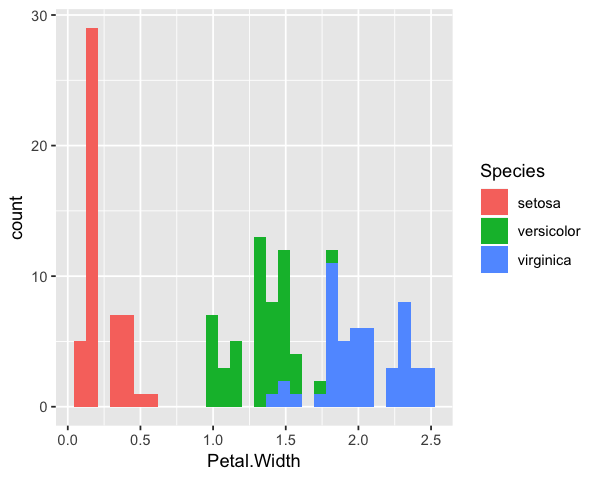

In [3]:
ggplot(iris, aes(x = Petal.Width, fill = Species)) + geom_histogram()

#### What just happened?
This is part of the [`ggplot2` library](https://ggplot2.tidyverse.org/) we loaded above, and it's a bit intimidating at first glance. In essence, the `ggplot` function takes a data frame (in this case `iris`) and identifies variables to plot (called `aesthetics`). We specified that our data comes from `Petal.Width` and that it should be color-coded using `Species`. We then use the `+` to add functions that plot the data, such as the one above. In the examples below you will see modifications of this syntax that will make these principles more intuitive.
#### What does this mean?
Looking at the histogram you can intuitively see that the distribution of petal width is diffierent between different species. However, we're looking at only at one variable, and we'll want to 
- summarize data by applying functions to the data frame
- look at interrelationships between the variables
- performing statistical tests on the data to quantify our intuition


## the _tidyverse_ package collection for data transformation and visualization
You see that the first thing we did is load the `tidyverse` library. This is actually a collection of many tools, including `ggplot2`, which allow data manipulation and visualization. We'll now explore this package works using the iris data set. We will start by introducing the piping notation `%>%`, which moves data from one function to another. For example, an alternative way to writing the plotting function above is 
```r
iris %>% ggplot(aes(x = Petal.Width, fill = Species)) + geom_histogram()
```
Try it in the code cell below! The operator `%>%` tells `ggplot` that the input is the output of the previous command, which is this case is just the contents of the data frame `iris`.


In this example, it's not actually easier than the original function. Let's see why you might want to do this.

In [4]:
iris %>% 
    group_by(Species) %>% 
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width))

Species,Petal.Width.Mean,Petal.Width.SD
setosa,0.246,0.1053856
versicolor,1.326,0.1977527
virginica,2.026,0.2746501


This set of commands is easy to read, illustrating a simple set of steps:
1. Group the data by species
2. Compute the average (mean) and [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) (amount of variability) for each species

However, the table is a bit hard to visualize in your mind, but we easily plot it by a slight modification of the code. In this case we're plotting the mean for each species and the rage covered by the standard deviation. In the example below, you see that we're using the `+` command to stack two types of plots, `geom_errorbar`, which plots the standard deviation and `geom_point`, which plots the dot corresponding to the mean.

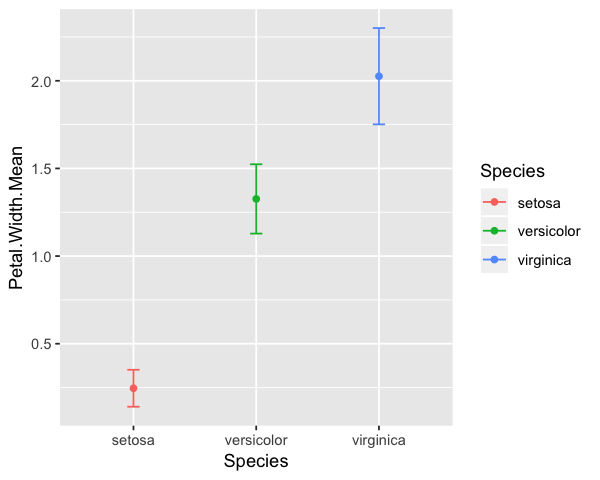

In [5]:
iris %>% 
    group_by(Species) %>%  # tell R to conduct analyses for each species
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width)) %>% 
    ggplot(aes(x = Species, y = Petal.Width.Mean, color = Species)) + 
        geom_errorbar(aes(ymin = Petal.Width.Mean - Petal.Width.SD, 
                      ymax = Petal.Width.Mean + Petal.Width.SD), width = .1) +
        geom_point()  # plot the dot representing the mean

**Side note:** You'll notice that I'm breaking up the code across lines to increase legibility. The `width` argument is likewise optional, and controls the width of the error bars, as I find the default pretty ugly. Likewise, you may find yourself tweaking the default plots to make them more appealing for you and your readers.

#### Custom functions

Intuitively, our estimate of the mean gets more accrurate the more flowers you measure. We can estimate how well we estimate the mean using a statistic called [_standard error of the mean_ (SEM)](https://en.wikipedia.org/wiki/Standard_error), which is defined as $ \sigma^-_{x} = \frac{s}{\sqrt(n)} $, where $s$ is the standard deviation and $n$ is the number of measurements. Clearly, as N gets bigger the SEM goes to zero, indicating that we have an increasingly precise estimate of the mean.

**Confusion alert:** The _standard deviation_ estimates how much variability there is in the data, _i.e._ a property of the samples population. The _standard error_ is a measure of how well we esimate a value we derive from sampling the population.

Let's say that you don't want to plot the standard deviation, but rather the standard error. Suprisingly, R doesn't have a built-in standard error function, but we can easily define one, and apply it to our data as we would a built-in function

In [6]:
se <- function(x) {
    sd(x)/sqrt(length(x))
}

This code just tells R to take a bunch of values as input, which we call `x` and then apply the above formula to them. 

In [7]:
iris %>% 
    group_by(Species) %>% 
    summarize(Petal.Width.Mean = mean(Petal.Width), 
              Petal.Width.SD = sd(Petal.Width),
              Petal.Width.SE = se(Petal.Width))  # apply custom SEM function

Species,Petal.Width.Mean,Petal.Width.SD,Petal.Width.SE
setosa,0.246,0.1053856,0.01490377
versicolor,1.326,0.1977527,0.02796645
virginica,2.026,0.2746501,0.03884138


## Statistical testing using regression models

Data visualization is a great way to understand the structure of the data, and R has many powerful ways to graphically look at the data. At the end of the day, though, we want to ask whether the differences we're seeing are _real_ in some sense. We accomplish this goal using statistical testing, in this example regression modeling. 

A regression asks whether data in a response (dependent) variable is correlated with one or more predictor (independent) variables. 

### Do the species differ in petal width?

Our visual examination of the data suggests that there are differences between groups. But how do we verify this intuition? The standard way is using statistical testing, which tells us the likelihood that we can obtain the given pattern by chance alone. We'll use a very classic statistical test to see whether there is a linear relationshp between petal length and width, looking specifically at _versicolor_ and _virginica_. 

_Note_: in the command below I didn't include `x =` or `y =`, _ggplot_ is smart enough to understand that the first two values correspond to them, unless specified otherwise. Less typing for you!

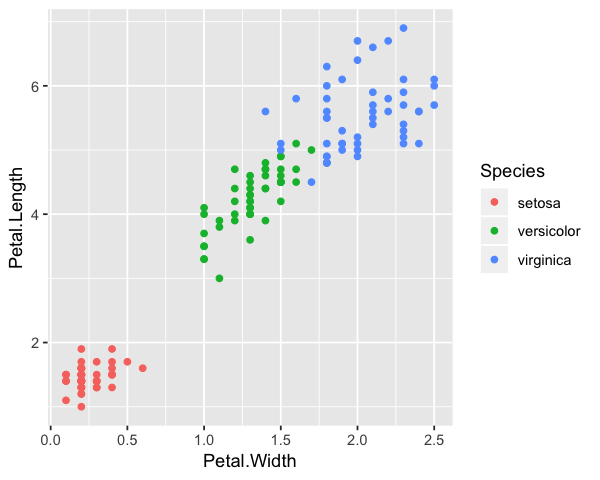

In [8]:
iris %>% ggplot(aes(Petal.Width, Petal.Length, color = Species)) + geom_point()

In [9]:
petal.fit <- iris %>% 
    filter(Species != "setosa") %>% 
    lm(Petal.Length ~ Petal.Width, data = .)
summary(petal.fit)


Call:
lm(formula = Petal.Length ~ Petal.Width, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9842 -0.3043 -0.1043  0.2407  1.2755 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.2240     0.1926   11.55   <2e-16 ***
Petal.Width   1.6003     0.1114   14.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4709 on 98 degrees of freedom
Multiple R-squared:  0.6779,	Adjusted R-squared:  0.6746 
F-statistic: 206.3 on 1 and 98 DF,  p-value: < 2.2e-16


We did something a touch tricky with the command by filtering the original data set to exclude _setosa_, and told the _lm_ command to accept piped data using the dot, while collecting the results into the `petal.fit` variable. How cool is it to do all of that in one line of code?!

Getting back to the analysis, there's a lot of output from the test, but the part that matters for our question ("are the species petal widths the same?" is the last line, which gives the probability that you would such differences by chance if the groups were the same (called a _p-value_). In this case the p-value is vanishingly small ($< 2.2*10^{-16}$). We typically assume that a p-value < 0.05 is significant, so we conclude that these differences are _statistically significant_.

We can use the same approach to create mode sophisticated models. For example, we see that petal width and height appears correlated. We can test this relationship simultaneously with a slightly mode complex model

In [10]:
petal.fit2 <- iris %>% 
    filter(Species != "setosa") %>% 
    lm(Petal.Length ~ Petal.Width + Species, data = .)
summary(petal.fit2)


Call:
lm(formula = Petal.Length ~ Petal.Width + Species, data = .)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.01942 -0.31949  0.02168  0.25755  1.17568 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)        2.8485     0.2581  11.037  < 2e-16 ***
Petal.Width        1.0645     0.1887   5.641 1.67e-07 ***
Speciesvirginica   0.5468     0.1595   3.428 0.000893 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.447 on 97 degrees of freedom
Multiple R-squared:  0.7127,	Adjusted R-squared:  0.7068 
F-statistic: 120.3 on 2 and 97 DF,  p-value: < 2.2e-16


In this case, let's look at the coefficients. 

- The `(Intercept)` corresponds to the point where the line crosses the x-axis, which is not significantly different from chance (p > 0.05). This makes biological sense since flowers with zero petal length shouldn't have petal withs either.

- In regression one of the levels is set to be the reference, and we test differences with respect to this level. R typically takes the alphabetically first level, which happens to be _versicolor_, and we compare _virginica_ to it. So, the `Speciesvirginica` coefficient tests whether _virginica_ is different from the intercept (i.e., _versicolor_). IN this case, we see that it's highly significant.

- The `Petal.Length` coefficient tests whether there is a linear relationship between petal width and length, and it's significant, as we saw in the plot above.

So, the statistical model has quantified the intuitive feeling we got about the data from looking at the plot. This is the principal role of statistics, to give a sense for how unlikely observations are to occur by chance alone (_vs._ a null model of some kind). You should always check your statistical analyses against the visualization of the data, and trust your eyes before numbers that a model spits at you.

### Importing data
In this example we used a built-in data set, but often you will have to import data from another source, such as transcribed field notes from Excel. There are a number of functions that can import Excel spreadsheets, but they require libraries to use. In general, you want to have your data immutable in the spreadsheet or some other form of file, and perform all the manipulations in R, so that they can be reproducible. We'll read in a file that exists in the same directory as the current R script and should be identical to the _iris_ data set.

**Data scientist tip:** You don't need to do this for this exercise, but I generally recommend locking your raw data to make them read-only, so that they are never altered. There are very many way you can accidentally destroy data in Excel, 

In [11]:
library(readxl) # load library that parses excel files
iris2 <- read_excel("data/iris.xlsx")
head(iris2)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


We can compare these data frames to make sure that they are identical. Always good practice to check your data for consistency.

In [12]:
setdiff(iris, iris2)

Warning message:
“Column `Species` joining factor and character vector, coercing into character vector”

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species


# Going on to the questions

Good job! You finished the tutorial. Now what? There are R-based exercises [here](Practical%202%20questions.ipynb). They are the ones you turn in.